In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [79]:
# Load the dataset
dataset=pd.read_csv('Dataset .csv')
dataset=pd.read_csv('Dataset .csv')


In [7]:
# identify the number of rows and columns
dataset.shape

(4411, 21)

In [6]:
# to check the columns name
dataset.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [3]:
dataset.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No         3.0   
1                  No                No                   No         3.0   
2                  No                No                   No         4.0   
3                  No                No                   No         4.0   
4                  No                No                   No         4.0   

   Aggregate rating  Rating color Rating text  Votes  
0               4.8    Dark Green   Excellent  314.0  
1               4.5    Dark Green   Excellent  591.0  
2               4.4         Green   Very Good  270.0  
3               4.9    Dark Green   Excellent  365.0  
4               4.8    Dark Green   Excellent  229.0  

[5 rows x 21 columns]

#### Task-1: Restaurant Rating

##### 1-Analyze the distribution of aggregate ratings and determine the most common rating range.


Most common rating range: 0.0 (706 restaurants)


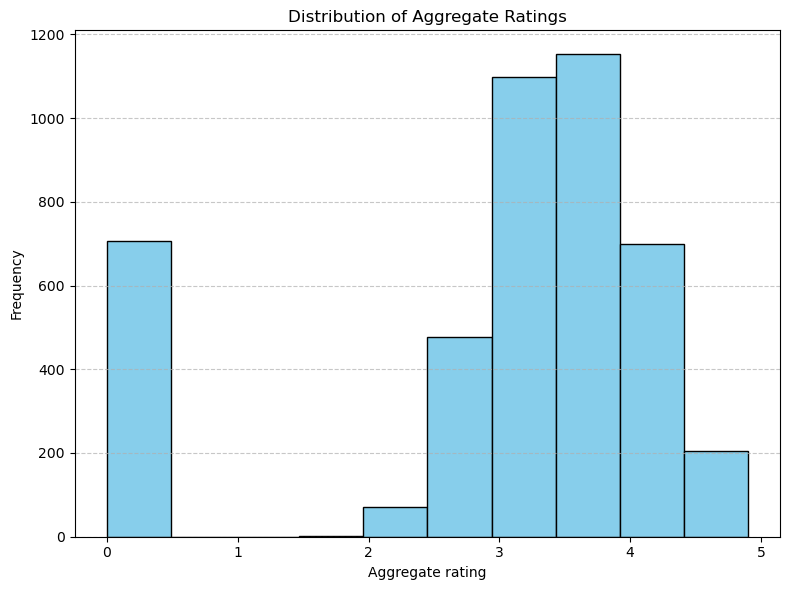

In [76]:
# 1-Analyze the distribution of aggregate ratings and determine the most common rating range.

# Analyze the distribution of aggregate ratings
plt.figure(figsize=(8, 6))
plt.hist(dataset['Aggregate rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Aggregate rating')
plt.ylabel('Frequency')
plt.title('Distribution of Aggregate Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Find the most common rating range
rating_counts = dataset['Aggregate rating'].value_counts()
most_common_rating = rating_counts.idxmax()
most_common_rating_count = rating_counts.max()

print(f'Most common rating range: {most_common_rating} ({most_common_rating_count} restaurants)')


# Show the histogram
plt.tight_layout()
plt.show()

##### 2-Calculate the average number of votes received by restaurants


In [18]:
# 2-Calculate the average number of votes received by restaurants
average_votes=dataset['Votes'].mean()
print(f'Average number of votes received by restaurants is : {average_votes:.2f}')

Average number of votes received by restaurants is : 230.26


### Task-2: Cuisine Combination

##### 1-Identify the most common combinations of  cuisines in the dataset.


In [64]:
# Extract the "Cuisines" and "Aggregate rating" columns
cuisine_ratings = dataset[['Cuisines', 'Aggregate rating']].dropna()

# Identify common cuisine combinations
cuisine_ratings['Cuisines'] = cuisine_ratings['Cuisines'].str.split(", ")
cuisine_ratings['Cuisines'] = cuisine_ratings['Cuisines'].apply(lambda x: tuple(sorted(x)))  # Sort cuisines to avoid duplicates

# Count common combinations
common_combinations = cuisine_ratings['Cuisines'].value_counts().head(18)

# Analyze ratings for cuisine combinations
average_ratings = cuisine_ratings.groupby("Cuisines")['Aggregate rating'].mean()

# Display results
print("\033[1;31mMost Common Cuisine Combinations:\033[0m")

print(common_combinations)

print('-'* 135)


Most Common Cuisine Combinations:
Cuisines
(North Indian,)                          354
(Chinese, North Indian)                  249
(Mughlai, North Indian)                  166
(Cafe,)                                  146
(Fast Food,)                             132
(Chinese,)                               126
(Chinese, Mughlai, North Indian)         117
(Bakery,)                                 89
(Bakery, Desserts)                        83
(Chinese, Continental, North Indian)      65
(Mithai, Street Food)                     54
(Chinese, Fast Food)                      54
(Chinese, North Indian, South Indian)     53
(Burger, Fast Food)                       51
(Mughlai,)                                50
(Fast Food, Pizza)                        49
(Street Food,)                            48
(Bakery, Fast Food)                       45
Name: count, dtype: int64
-------------------------------------------------------------------------------------------------------------------------

#### 2- Determine if certain cuisine combinations  tend to have higher ratings.


In [66]:
print("\033[1;31mAverage Ratings for Cuisine Combinations:\033[0m")
for combination, count in common_combinations.items():
    combination_str = ', '.join(combination)
    average_rating = average_ratings[combination]
    print(f"Cuisines: {combination_str} | Count: {count} | Average Rating: {average_rating:.2f}")


Average Ratings for Cuisine Combinations:
Cuisines: North Indian | Count: 354 | Average Rating: 1.87
Cuisines: Chinese, North Indian | Count: 249 | Average Rating: 2.48
Cuisines: Mughlai, North Indian | Count: 166 | Average Rating: 2.95
Cuisines: Cafe | Count: 146 | Average Rating: 2.90
Cuisines: Fast Food | Count: 132 | Average Rating: 2.35
Cuisines: Chinese | Count: 126 | Average Rating: 2.34
Cuisines: Chinese, Mughlai, North Indian | Count: 117 | Average Rating: 2.74
Cuisines: Bakery | Count: 89 | Average Rating: 2.54
Cuisines: Bakery, Desserts | Count: 83 | Average Rating: 2.57
Cuisines: Chinese, Continental, North Indian | Count: 65 | Average Rating: 3.18
Cuisines: Mithai, Street Food | Count: 54 | Average Rating: 2.09
Cuisines: Chinese, Fast Food | Count: 54 | Average Rating: 2.02
Cuisines: Chinese, North Indian, South Indian | Count: 53 | Average Rating: 2.24
Cuisines: Burger, Fast Food | Count: 51 | Average Rating: 3.35
Cuisines: Mughlai | Count: 50 | Average Rating: 2.11
Cuisi

### Task-3: Geographic Analysis

##### 1-Plot the locations of restaurants on a  map using longitude and latitude coordinates.

In [81]:
pip install folium


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   -------------- ------------------------- 41.0/110.9 kB ? eta -:--:--
   ---------------------- ----------------- 61.4/110.9 kB 1.1 MB/s eta 0:00:01
   -------------------------------- ------ 92.2/110.9 kB 751.6 kB/s eta 0:00:01
   -------------------------------------- 110.9/110.9 kB 718.9 kB/s eta 0:00:00


In [ ]:
import folium

# Create a map centered at specific coordinates
mymap = folium.Map(location=[28.6139, 77.2090], zoom_start=10)

# Save the map to an HTML file
mymap.save("map.html")
print("Map saved as 'map.html'")


In [82]:
plt.figure(figsize=(10,7))
import folium
from folium.plugins import MarkerCluster

# Create a base map centered around the average location of all restaurants
latitude_mean = dataset['Latitude'].mean()
longitude_mean = dataset['Longitude'].mean()
maps = folium.Map(location=[latitude_mean, longitude_mean], zoom_start=12)

# Create a marker cluster to avoid overlapping markers
marker_cluster = MarkerCluster().add_to(maps)

# Add a marker for each restaurant using latitude and longitude
for index, row in dataset.iterrows():
    if not pd.isnull(row['Latitude']) and not pd.isnull(row['Longitude']):
        folium.Marker(location=[row['Latitude'], row['Longitude']],
                      popup=row['Restaurant Name']).add_to(marker_cluster)

# Display the map
maps

<Figure size 1000x700 with 0 Axes>

#### Task-4: Restaurant Chains

##### 1-Identify if there are any restaurant chains present in the dataset.    

In [78]:
restaurant_counts = dataset['Restaurant Name'].value_counts()

#Identify chains (restaurants that appear more than once)
restaurant_chains = restaurant_counts[restaurant_counts > 1]

#Display the results
print("\033[1;31mRestaurant chains found in the dataset:\033[0m")

print(restaurant_chains)

Restaurant chains found in the dataset:
Restaurant Name
Cafe Coffee Day            36
Domino's Pizza             30
McDonald's                 25
Subway                     24
Barbeque Nation            21
                           ..
Mom's Kitchen               2
Bikaner Misthan Bhandar     2
Laxmi Ice Cream             2
Zaika                       2
Defence Bakery              2
Name: count, Length: 291, dtype: int64


##### 2-Analyze the ratings and popularity of different restaurant chains.


                      Restaurant Name  Aggregate rating    Votes
305                   Barbeque Nation          4.338095  22011.0
53          AB's - Absolute Barbecues          4.825000  13400.0
3434                             Toit          4.800000  10934.0
3459                         Truffles          3.950000   9682.0
1165                       Farzi Cafe          4.380000   9230.0
...                               ...               ...      ...
1479  Hind Bakery & Chinese Fast Food          0.000000      0.0
3427                      Tinker Koch          0.000000      0.0
3076                Taj Chicken Point          0.000000      0.0
798               Chinese Hot Express          0.000000      0.0
3214                 The Cake Affairs          0.000000      0.0

[3676 rows x 3 columns]


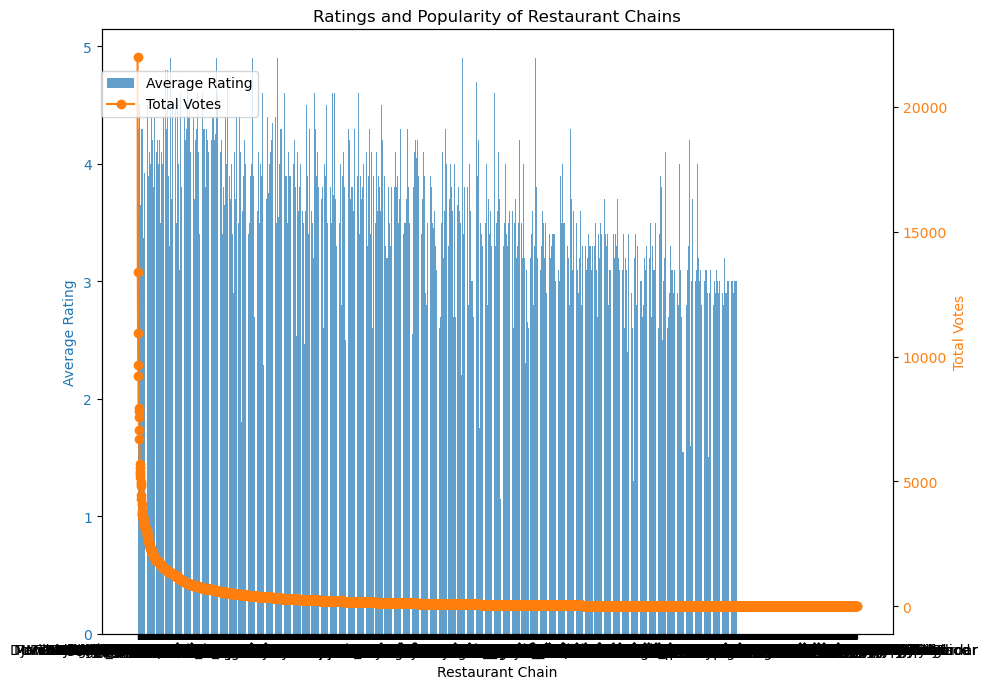

In [77]:
chain_stats = dataset.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',  # Average rating
    'Votes': 'sum'     # Total number of votes
}).reset_index()

# Sort the DataFrame by total votes for better visualization
chain_stats = chain_stats.sort_values(by='Votes', ascending=False)

# Display the results
print(chain_stats)

# Step 2: Visualize the results

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(10, 7))

# Plot ratings on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Restaurant Chain')
ax1.set_ylabel('Average Rating', color=color)
ax1.bar(chain_stats['Restaurant Name'], chain_stats['Aggregate rating'], color=color, alpha=0.7, label='Average Rating')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for the votes
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Total Votes', color=color)
ax2.plot(chain_stats['Restaurant Name'], chain_stats['Votes'], color=color, marker='o', label='Total Votes')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legends
plt.title('Ratings and Popularity of Restaurant Chains')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Show the plot
plt.show()